In [1]:
# install machine gnostics
# recommended to run in a new virtual environment

# !pip install machinegnostics #<-- Uncomment this line to install the package

# Gnostic Random Forest Regressor

### **Overview**
The **Machine Gnostics Random Forest Regressor** enhances the traditional random forest by incorporating **Gnostic Weighted Learning**. This makes the ensemble robust to outliers in the target variable, which typically skew standard Mean Squared Error (MSE) based models.

Key advantages:
- **Robust Regression**: Minimizes the impact of extreme outliers on predicted values.
- **Adaptive Weighting**: Iteratively learns to trust reliable data points and ignore anomalies.
- **Ensemble Stability**: Reduces variance while maintaining robustness.
- **Improved Generalization**: Focuses on the underlying trend rather than fitting to noise.

---

### **Theoretical Background**

The Gnostic Random Forest Regressor operates on the **Ideal Gnostic Cycle**:

1.  **Initial Ensemble**: Defines a random forest on the data.
2.  **Residual Analysis**: Computes the residuals of the ensemble's predictions.
3.  **Thermodynamic Weighting**: Converts residuals into gnostic probability weights. Points with high "surprise" (large error) get lower weights.
4.  **Refinement**: The next iteration's forest is trained with these new sample weights, effectively filtering out the influence of the outliers.

***

## Example 1: Robust Regression with Extreme Outliers

We create a synthetic dataset where the signal is contaminated with significant outliers. A standard model might be pulled towards these outliers, but the Gnostic model should resist them.

Dataset: 250 samples
Train set: 200 samples
Test set: 50 samples


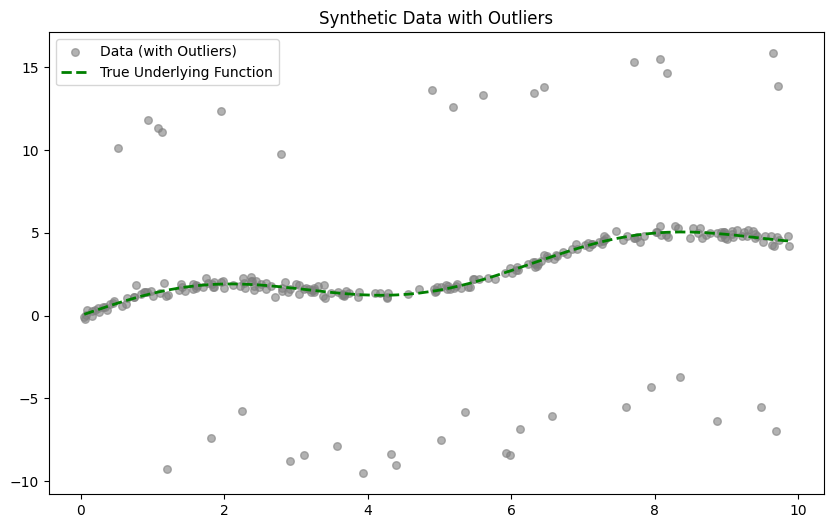

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from machinegnostics.models import GnosticRandomForestRegressor, train_test_split
from machinegnostics.metrics import mean_squared_error, r2_score

# Set random seed
np.random.seed(42)

def generate_outlier_data(n_samples=200, outlier_ratio=0.15):
    """
    Generate synthetic regression data with localized outliers.
    """
    # Feature X
    X = np.sort(np.random.rand(n_samples, 1) * 10, axis=0)
    
    # Target y: Linear trend + sine wave + noise
    y = 0.5 * X.ravel() + np.sin(X.ravel()) + np.random.normal(0, 0.2, n_samples)
    
    # Add outliers
    n_outliers = int(n_samples * outlier_ratio)
    outlier_indices = np.random.choice(n_samples, n_outliers, replace=False)
    
    # Shift outliers vertically
    y[outlier_indices] += np.random.choice([-10, 10], size=n_outliers) + np.random.normal(0, 1, n_outliers)
    
    return X, y

# Generate data
X, y = generate_outlier_data(n_samples=250, outlier_ratio=0.15)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_seed=42)

print(f"Dataset: {X.shape[0]} samples")
print(f"Train set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Visualize raw data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='gray', s=30, alpha=0.6, label='Data (with Outliers)')
plt.plot(X, 0.5 * X.ravel() + np.sin(X.ravel()), color='green', linewidth=2, linestyle='--', label='True Underlying Function')
plt.title("Synthetic Data with Outliers")
plt.legend()
plt.show()

In [3]:
# Initialize and train Gnostic Random Forest Regressor
model = GnosticRandomForestRegressor(
    n_estimators=100,
    max_depth=6,
    gnostic_weights=True,
    max_iter=10,
    tolerance=1e-3,
    verbose=True
)

print("Training Gnostic Random Forest Regressor...")
model.fit(X_train, y_train)

print(f"\nModel trained!")
print(f"Iterations run: {model._iter}")
try:
    print(f"Final loss: {model.cross_entropy_loss:.6f}")
except:
    pass

2026-01-30 17:40:23,633 | GnosticRandomForestRegressor | INFO | GnosticRandomForestRegressor initialized.
2026-01-30 17:40:23,633 | GnosticRandomForestRegressor | INFO | HistoryCartBase initialized.
2026-01-30 17:40:23,634 | GnosticRandomForestRegressor | INFO | Starting fit process for GnosticRandomForestRegressor.
2026-01-30 17:40:23,634 | GnosticRandomForestRegressor | INFO | Starting fit input/output processing.
2026-01-30 17:40:23,634 | GnosticRandomForestRegressor | INFO | Checking input X of type: <class 'numpy.ndarray'>
2026-01-30 17:40:23,634 | GnosticRandomForestRegressor | INFO | Identifying and converting data of type: <class 'numpy.ndarray'>
2026-01-30 17:40:23,634 | GnosticRandomForestRegressor | INFO | Checking target y of type: <class 'numpy.ndarray'>
2026-01-30 17:40:23,635 | GnosticRandomForestRegressor | INFO | Identifying and converting data of type: <class 'numpy.ndarray'>
2026-01-30 17:40:23,635 | GnosticRandomForestRegressor | INFO | Starting fit process for Cart

Training Gnostic Random Forest Regressor...


2026-01-30 17:40:23,792 | GnosticRandomForestRegressor | INFO | Iteration 4: Loss 132.9613514530596, Rentropy 0.029911594081429595
2026-01-30 17:40:23,825 | GnosticRandomForestRegressor | INFO | Iteration 5: Loss 133.47159844611812, Rentropy 0.029841085764436306
2026-01-30 17:40:23,859 | GnosticRandomForestRegressor | INFO | Iteration 6: Loss 133.08682825611592, Rentropy 0.02998075272404574
2026-01-30 17:40:23,892 | GnosticRandomForestRegressor | INFO | Iteration 7: Loss 134.38616855627805, Rentropy 0.029988705168818824
2026-01-30 17:40:23,926 | GnosticRandomForestRegressor | INFO | Iteration 8: Loss 133.7985439645927, Rentropy 0.029241346541817287
2026-01-30 17:40:23,959 | GnosticRandomForestRegressor | INFO | Iteration 9: Loss 133.37897831103024, Rentropy 0.03037281656789532
2026-01-30 17:40:23,993 | GnosticRandomForestRegressor | INFO | Iteration 10: Loss 134.0759529501717, Rentropy 0.02861239637662936



Model trained!
Iterations run: 10


2026-01-30 17:40:24,027 | GnosticRandomForestRegressor | INFO | Making predictions with GnosticRandomForestRegressor.
2026-01-30 17:40:24,027 | GnosticRandomForestRegressor | INFO | Starting predict input/output processing.
2026-01-30 17:40:24,027 | GnosticRandomForestRegressor | INFO | Checking input X for prediction of type: <class 'numpy.ndarray'>
2026-01-30 17:40:24,027 | GnosticRandomForestRegressor | INFO | Checking input X of type: <class 'numpy.ndarray'>
2026-01-30 17:40:24,028 | GnosticRandomForestRegressor | INFO | Identifying and converting data of type: <class 'numpy.ndarray'>
2026-01-30 17:40:24,035 | GnosticRandomForestRegressor | INFO | Making predictions with GnosticRandomForestRegressor.
2026-01-30 17:40:24,035 | GnosticRandomForestRegressor | INFO | Starting predict input/output processing.
2026-01-30 17:40:24,035 | GnosticRandomForestRegressor | INFO | Checking input X for prediction of type: <class 'numpy.ndarray'>
2026-01-30 17:40:24,035 | GnosticRandomForestRegres

Model Performance (Test Set):
MSE: 0.0000
R2 Score: 0.0660


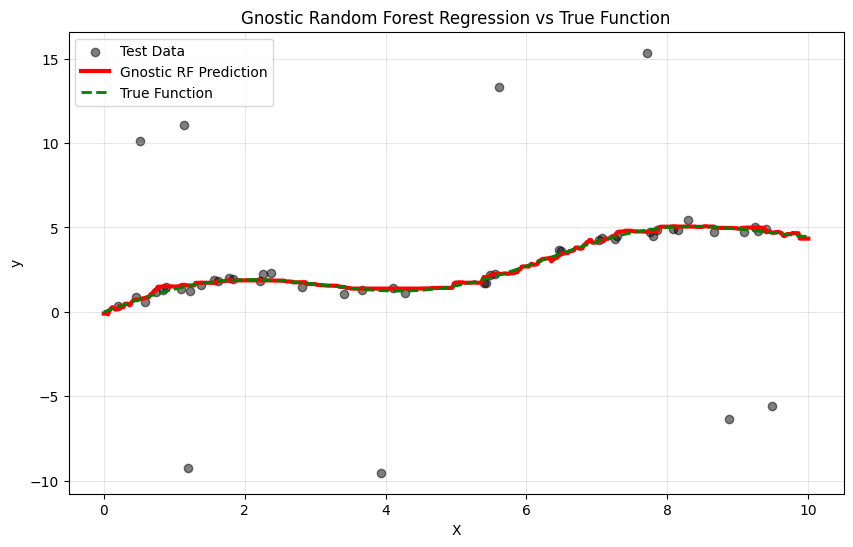

In [4]:
# Predict and Evaluate
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Model Performance (Test Set):")
print("=" * 40)
print(f"MSE: {mse_test:.4f}")
print(f"R2 Score: {r2_test:.4f}")
print("=" * 40)

# Visualization
X_grid = np.linspace(0, 10, 500)[:, np.newaxis]
y_grid_pred = model.predict(X_grid)

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black', label='Test Data', alpha=0.5)
plt.plot(X_grid, y_grid_pred, color='red', linewidth=3, label='Gnostic RF Prediction')
plt.plot(X_grid, 0.5 * X_grid.ravel() + np.sin(X_grid.ravel()), color='green', linestyle='--', linewidth=2, label='True Function')

plt.title("Gnostic Random Forest Regression vs True Function")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Example 2: Understanding Gnostic Weights

The model assigns lower weights (yellow/light) to the outliers, effectively ignoring them during the training process to find the true underlying trend (red line).

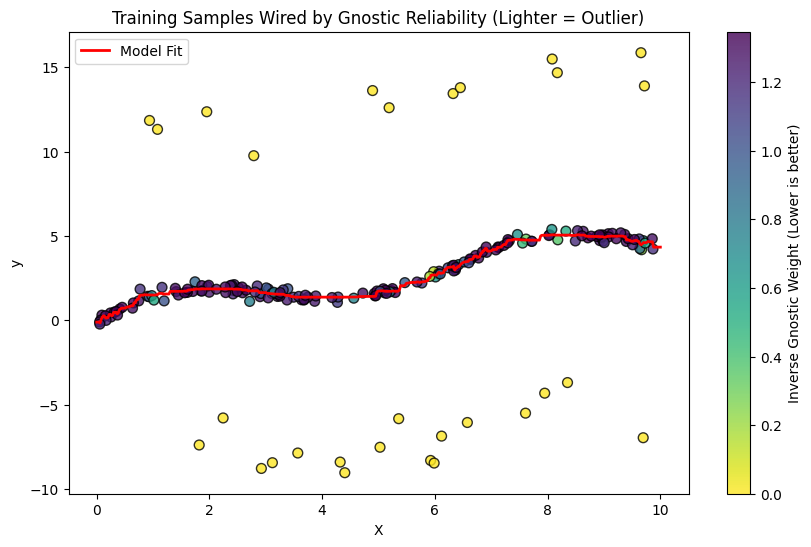

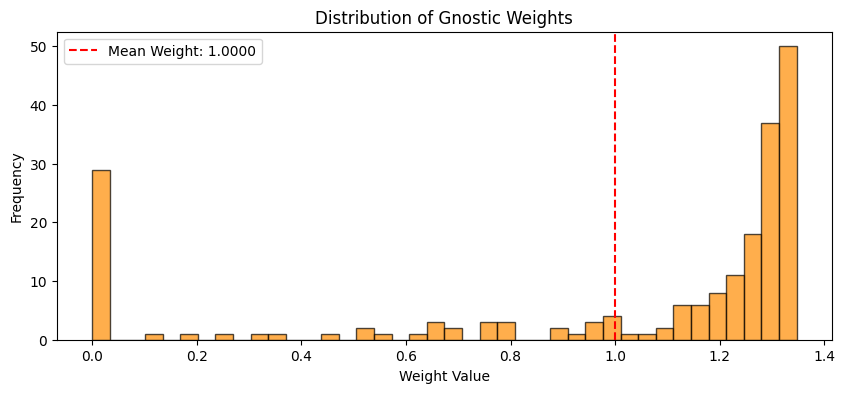

In [5]:
# Visualize Gnostic Weights
weights = model.weights

plt.figure(figsize=(10, 6))

# Plot training points colored by their gnostic weight
sc = plt.scatter(X_train, y_train, c=weights, cmap='viridis_r', s=50, edgecolors='k', alpha=0.8)
plt.plot(X_grid, y_grid_pred, color='red', linewidth=2, label='Model Fit')

plt.title("Training Samples Wired by Gnostic Reliability (Lighter = Outlier)")
plt.xlabel("X")
plt.ylabel("y")
plt.colorbar(sc, label='Inverse Gnostic Weight (Lower is better)')
plt.legend()
plt.show()

# Histogram of weights
plt.figure(figsize=(10, 4))
plt.hist(weights, bins=40, color='darkorange', edgecolor='black', alpha=0.7)
plt.axvline(np.mean(weights), color='red', linestyle='--', label=f'Mean Weight: {np.mean(weights):.4f}')
plt.title("Distribution of Gnostic Weights")
plt.xlabel("Weight Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

## Model History

Tracking the optimization progress. The curve shows how the model stabilizes into a robust state.

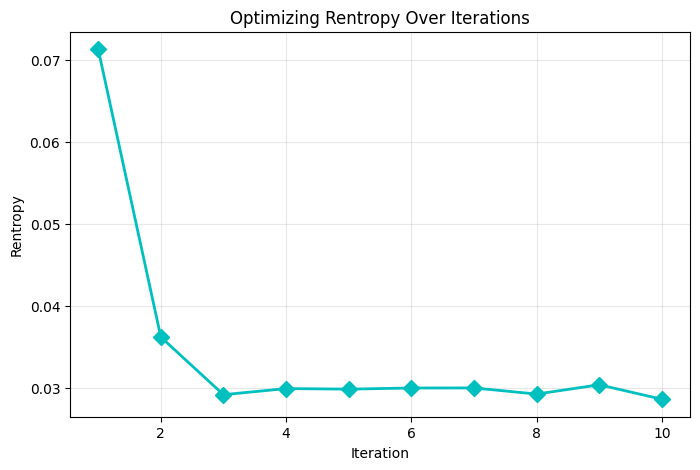

Convergence achieved in 11 iterations.


In [6]:
history = model._history

if len(history) > 1:
    iterations = [h['iteration'] for h in history if h['iteration'] is not None]
    
    # Check what metrics are available (typically rentropy for regression)
    metric = 'rentropy' if 'rentropy' in history[1] else 'loss'
    
    values = [h.get(metric, np.nan) for h in history if h['iteration'] is not None]
    
    plt.figure(figsize=(8, 5))
    plt.plot(iterations, values, 'c-D', linewidth=2, markersize=8)
    plt.title(f'Optimizing {metric.capitalize()} Over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel(metric.capitalize())
    plt.grid(True, alpha=0.3)
    plt.show()
    
    print(f"Convergence achieved in {len(iterations)} iterations.")
else:
    print("Model converged immediately or no history recorded.")